In [2]:
import pandas as pd

file_path = 'Question_1.csv'
data = pd.read_csv(file_path)

unique_values = data.nunique()
missing_values = data.isnull().sum()

unique_values, missing_values

(Unnamed: 0              61069
 cap-diameter             2571
 cap-shape                   7
 cap-surface                11
 cap-color                  12
 does-bruise-or-bleed        2
 gill-attachment             7
 gill-spacing                3
 gill-color                 12
 stem-height              2226
 stem-width               4630
 stem-root                   5
 stem-surface                8
 stem-color                 13
 veil-type                   1
 veil-color                  6
 has-ring                    2
 ring-type                   8
 spore-print-color           7
 habitat                     8
 season                      4
 class                       2
 dtype: int64,
 Unnamed: 0                  0
 cap-diameter                0
 cap-shape                   0
 cap-surface             14120
 cap-color                   0
 does-bruise-or-bleed        0
 gill-attachment          9884
 gill-spacing            25063
 gill-color                  0
 stem-height            

In [3]:
from sklearn.impute import SimpleImputer

threshold = len(data) * 0.5
data_cleaned = data.dropna(thresh=threshold, axis=1)

numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
data_cleaned[numerical_cols] = num_imputer.fit_transform(data_cleaned[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_cols] = cat_imputer.fit_transform(data_cleaned[categorical_cols])


<ipython-input-3-600b4545d44c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols] = num_imputer.fit_transform(data_cleaned[numerical_cols])
<ipython-input-3-600b4545d44c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[categorical_cols] = cat_imputer.fit_transform(data_cleaned[categorical_cols])


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le


<ipython-input-4-2809b1c97f98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-4-2809b1c97f98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
<ipython-input-4-2809b1c97f98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

data_cleaned.head()


<ipython-input-5-3f4e6ed4f262>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])


,Unnamed: 0,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,-1.732022,1.619462,6,2,6,0,2,0,10,3.076705,0.492293,11,1,2,0,3,1
1,-1.731966,1.873982,6,2,6,0,2,0,10,3.385311,0.601900,11,1,2,0,2,1
2,-1.731909,1.393432,6,2,6,0,2,0,10,3.328931,0.557061,11,1,2,0,3,1
3,-1.731852,1.412426,2,3,1,0,2,0,10,2.726555,0.381690,11,1,5,0,3,1
4,-1.731796,1.501699,6,3,6,0,2,0,10,2.952075,0.503254,11,1,5,0,3,1


In [6]:
class_counts = data_cleaned['class'].value_counts()
class_counts


class
1    33888
0    27181
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('class', axis=1)
y = data_cleaned['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

start_train = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
end_train = time.time()

start_predict = time.time()
y_pred = clf.predict(X_test)
end_predict = time.time()

train_time = end_train - start_train
predict_time = end_predict - start_predict

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, train_time, predict_time, conf_matrix



(0.9974619289340102,
 0.9974618918538474,
 0.9974619289340102,
 0.9974619036102145,
 0.2821078300476074,
 0.003813505172729492,
 array([[5358,   16],
        [  15, 6825]]))

In [9]:
from sklearn.neighbors import KNeighborsClassifier

start_train_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
end_train_knn = time.time()

start_predict_knn = time.time()
y_pred_knn = knn.predict(X_test)
end_predict_knn = time.time()

train_time_knn = end_train_knn - start_train_knn
predict_time_knn = end_predict_knn - start_predict_knn

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

accuracy_knn, precision_knn, recall_knn, f1_knn, train_time_knn, predict_time_knn, conf_matrix_knn


(0.9970525626330441,
 0.9970534018853338,
 0.9970525626330441,
 0.9970527382162941,
 0.017775774002075195,
 4.508990287780762,
 array([[5359,   15],
        [  21, 6819]]))

In [10]:
import pandas as pd

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree': [accuracy, precision, recall, f1],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_knn]
})


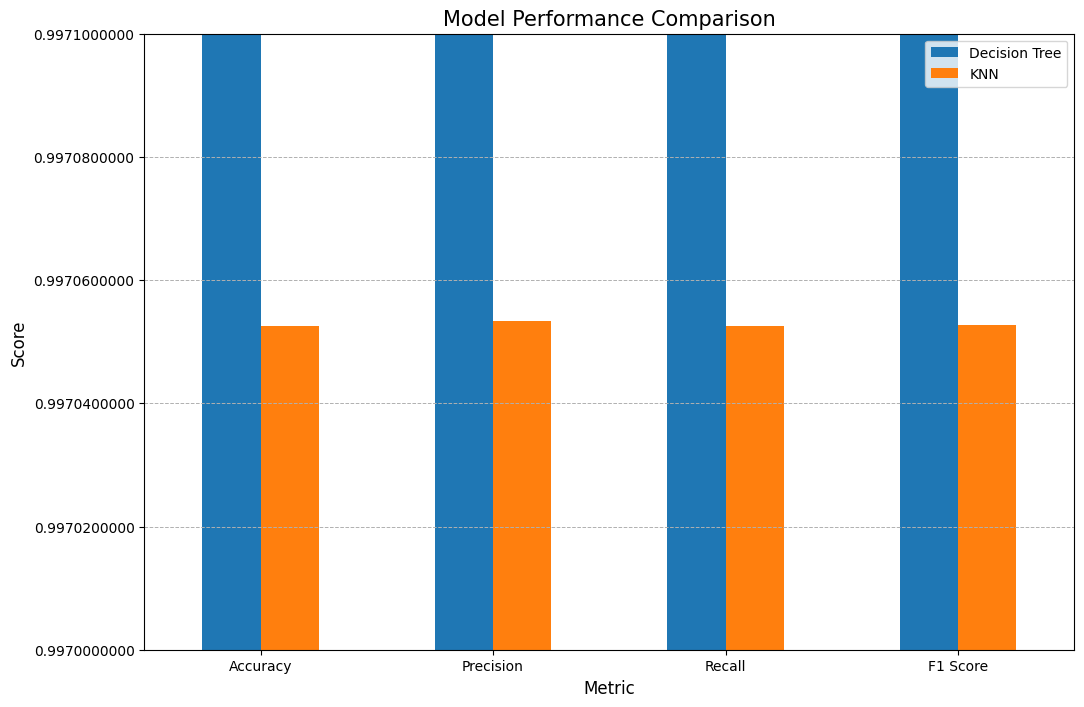

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))

metrics_df.plot(x='Metric', kind='bar', ax=ax)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.10f}'.format(y)))
ax.set_ylim(0.997, 0.9971)

plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.title('Model Performance Comparison', fontsize=15)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)

plt.xticks(rotation=0)

plt.legend(loc='upper right')

plt.show()



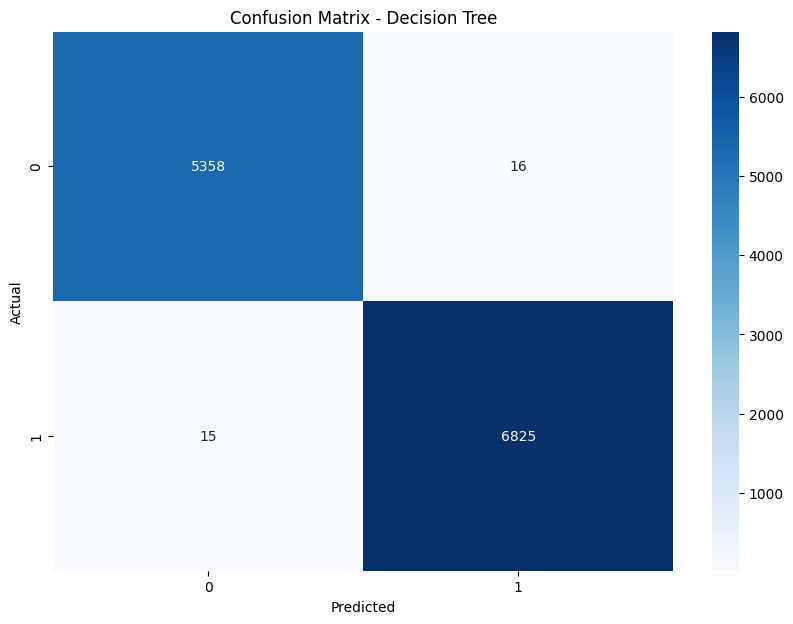

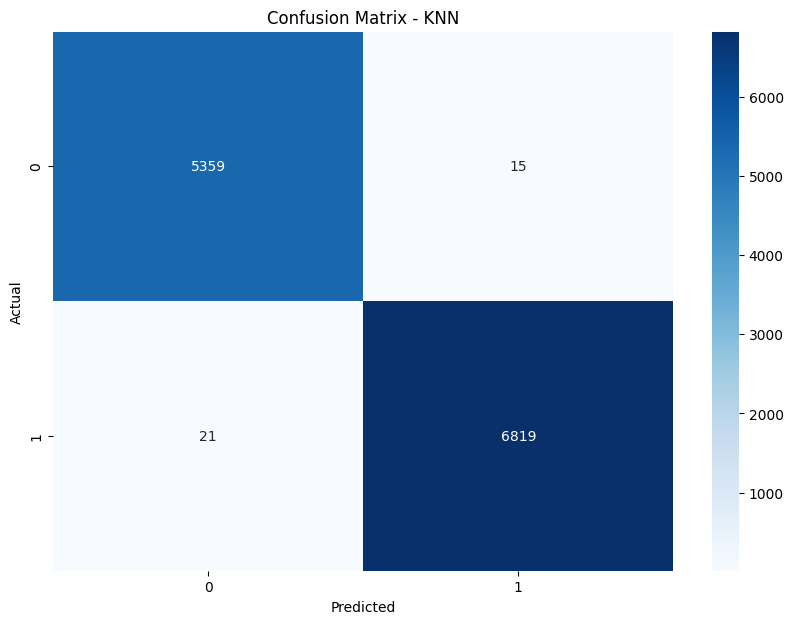

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

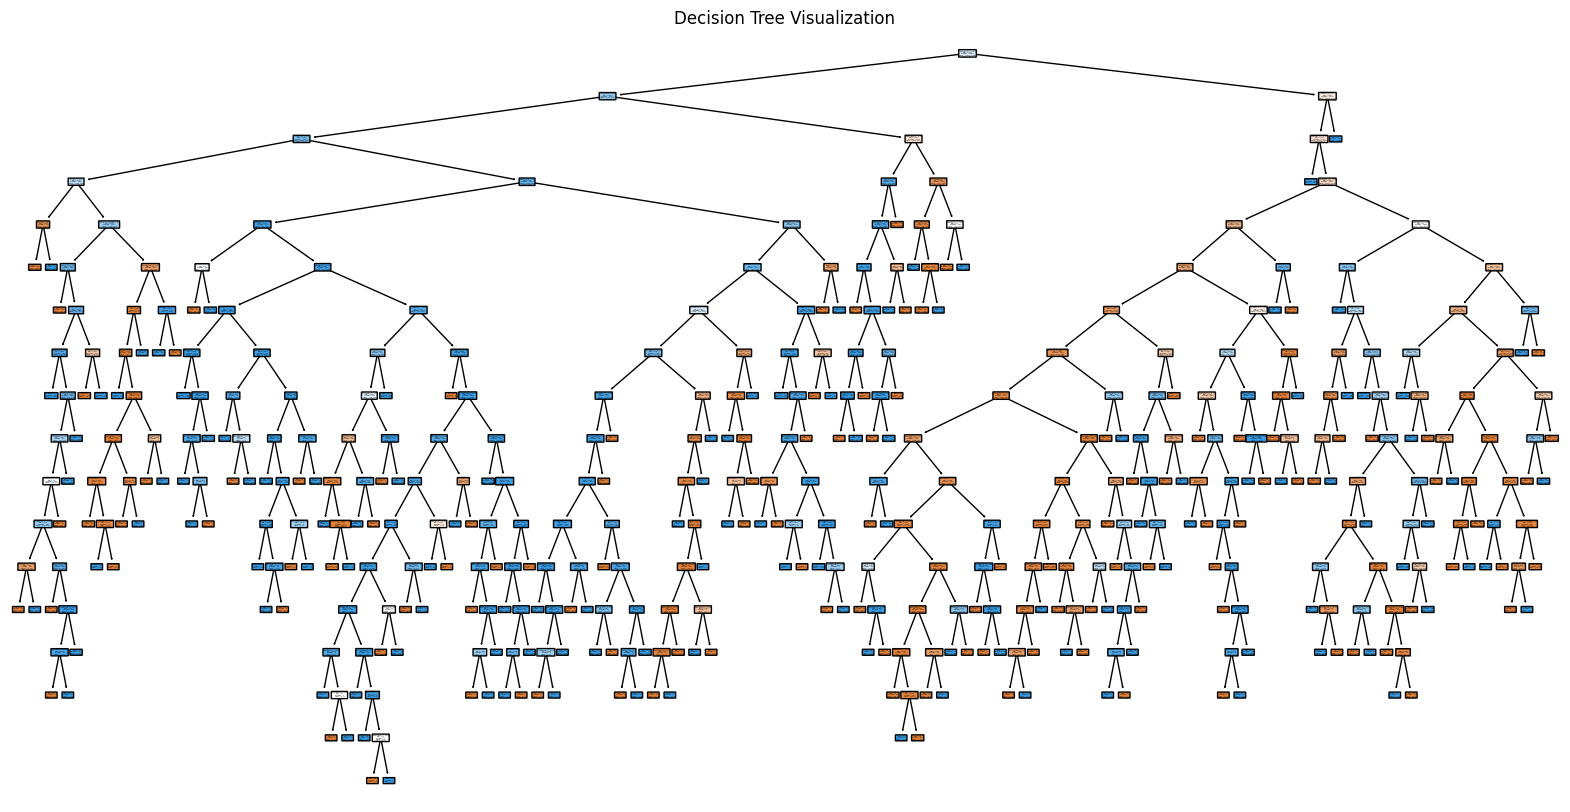

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data_cleaned.drop('class', axis=1).columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

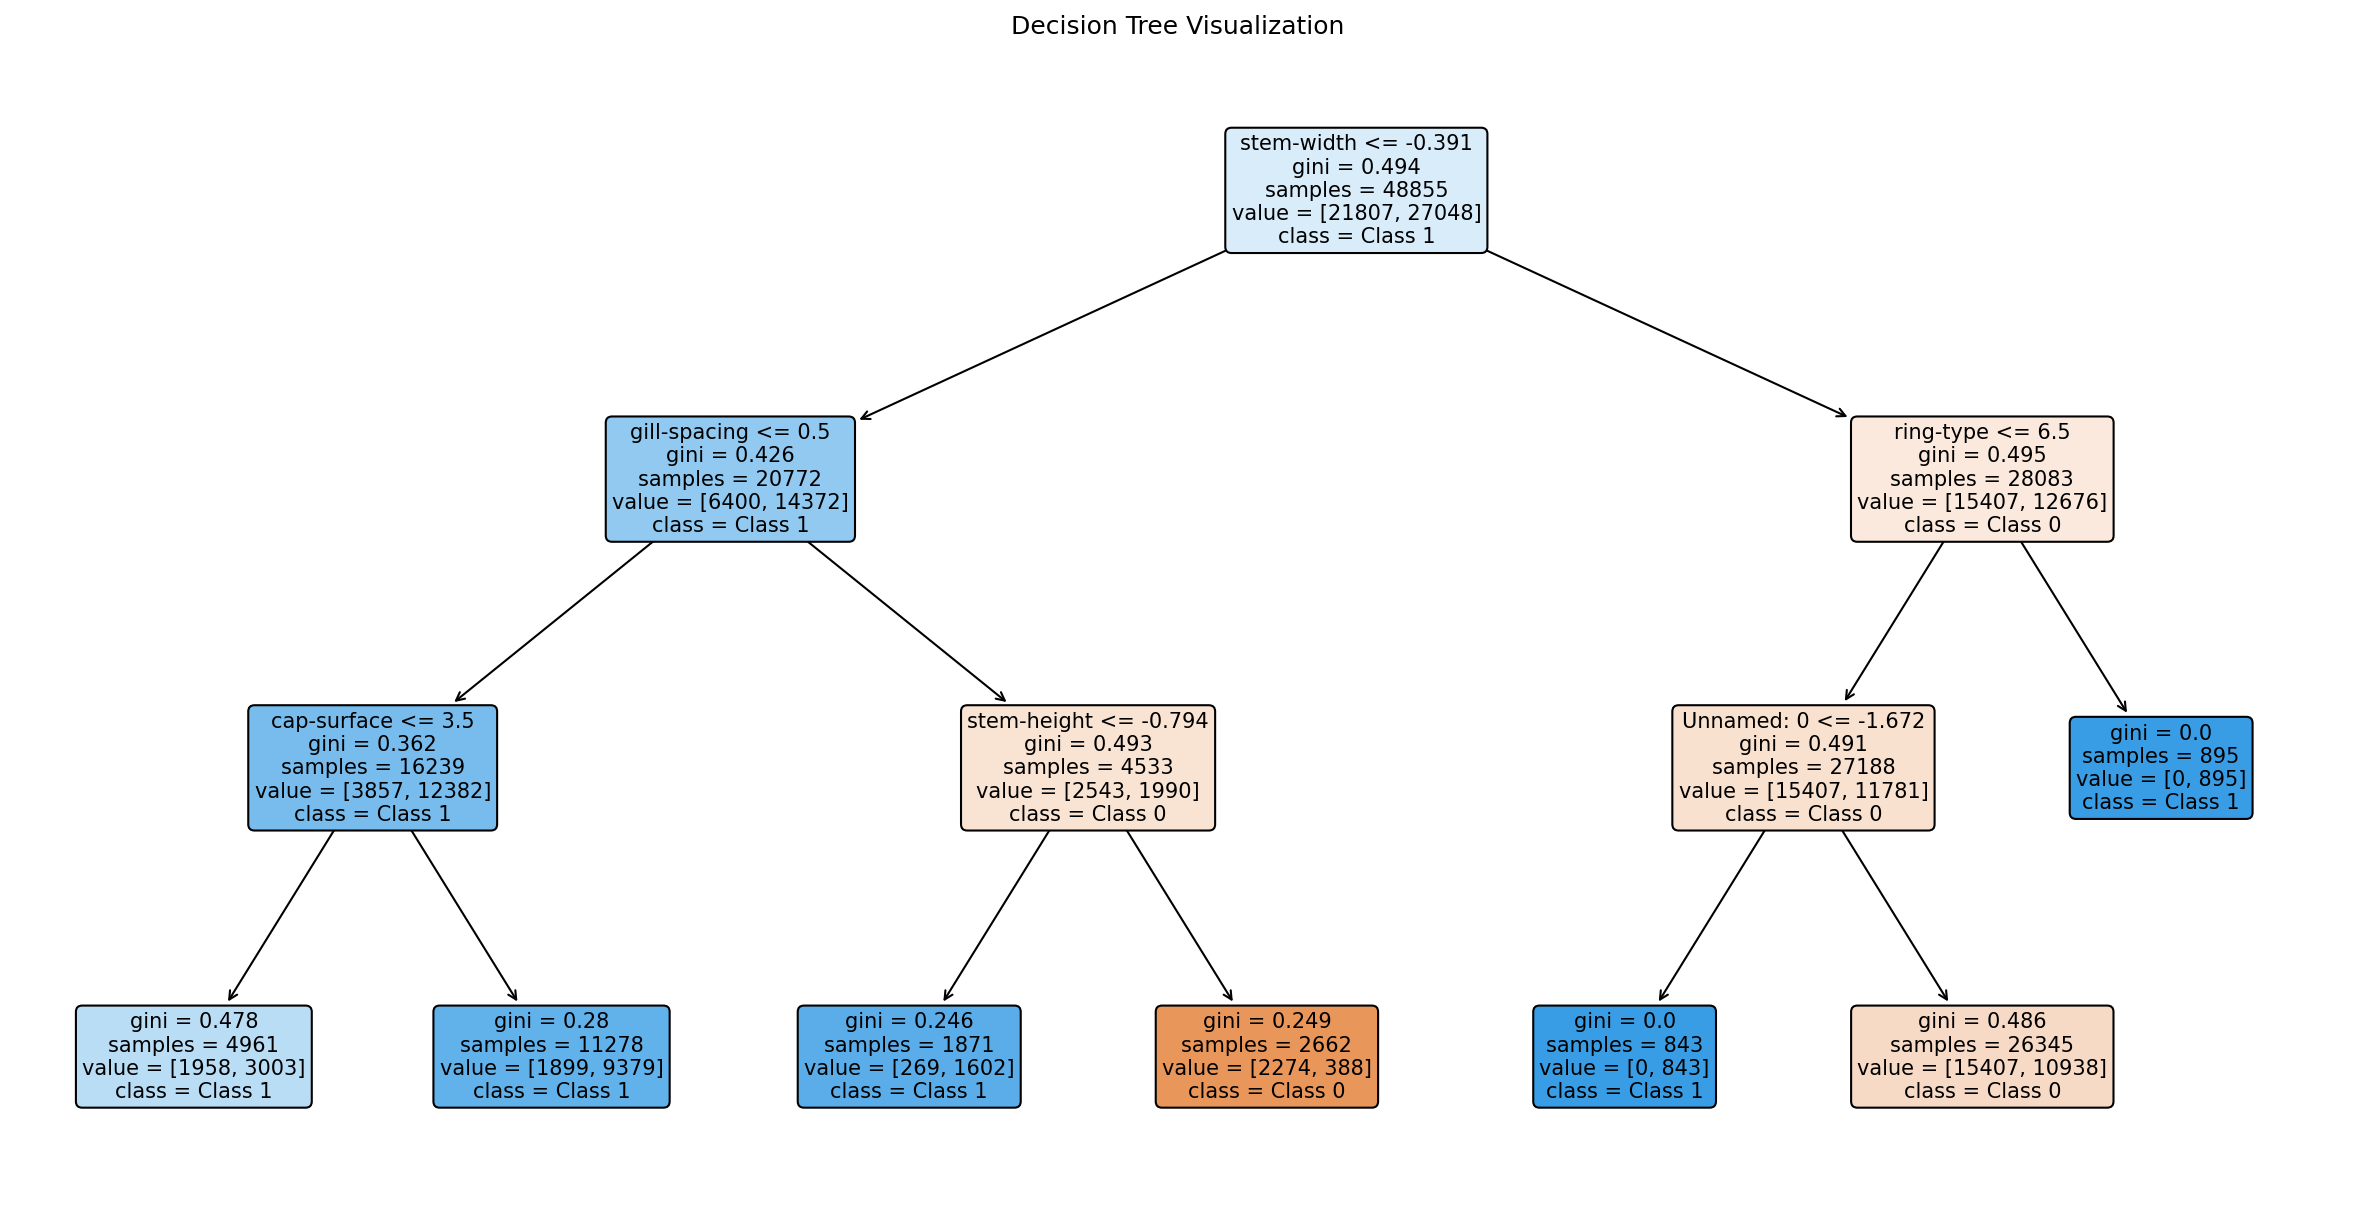

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10), dpi=150)
plot_tree(clf, filled=True, feature_names=data_cleaned.drop('class', axis=1).columns, class_names=['Class 0', 'Class 1'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


## Section **2**

In [15]:
import pandas as pd

data = pd.read_csv("Question_2.csv")

data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [16]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        labels.append(data[i + window_size])
    return np.array(sequences), np.array(labels)

window_size = 10
sequences, labels = create_sequences(data['Temp'].values, window_size)

sequences_df = pd.DataFrame(sequences, columns=[f'Day_{i+1}' for i in range(window_size)])
labels_df = pd.DataFrame(labels, columns=['Day_11'])


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 1.9076905202696846
RMSE: 2.4113535227841543


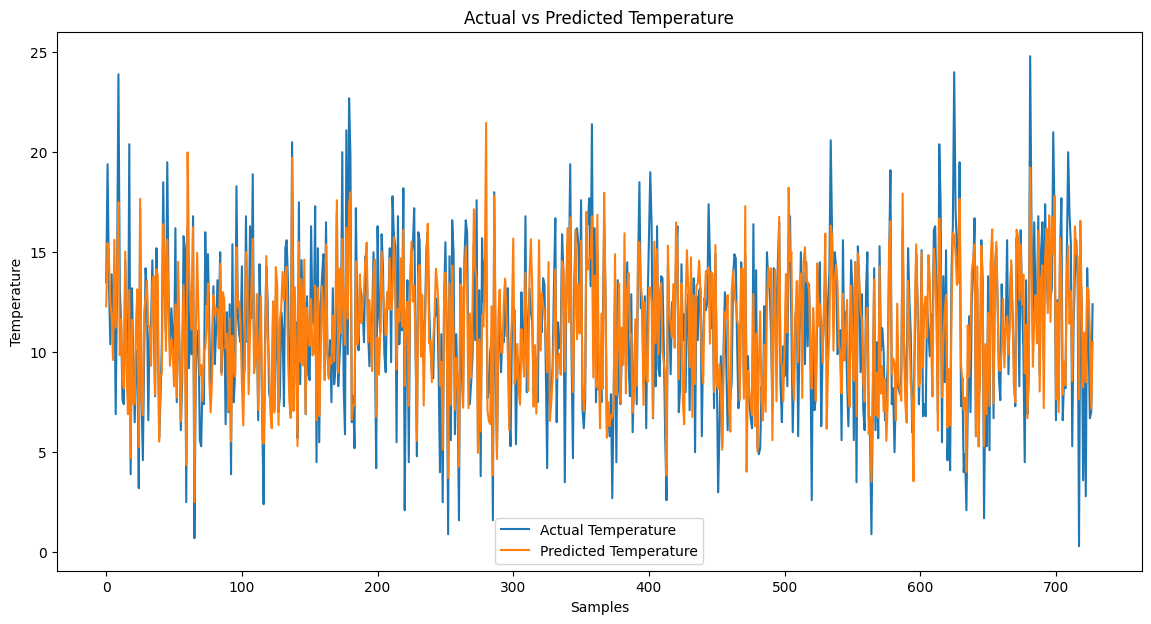

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.title('Actual vs Predicted Temperature')
plt.show()

In [23]:
new_labels = np.where(labels[1:] > labels[:-1], 1, 0)
new_sequences = sequences[:-1]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_sequences, new_labels, test_size=0.2, random_state=42)

In [24]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_new, y_train_new)

SVC(kernel='linear')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_svm = svm_model.predict(X_test_new)

accuracy = accuracy_score(y_test_new, y_pred_svm)
precision = precision_score(y_test_new, y_pred_svm)
recall = recall_score(y_test_new, y_pred_svm)
f1 = f1_score(y_test_new, y_pred_svm)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.5851648351648352
Precision: 0.5995085995085995
Recall: 0.6370757180156658
F1 Score: 0.6177215189873417


In [32]:
import numpy as np

def calculate_agreement_rate(y_pred_linear_classified, y_pred_svm):
    return np.mean(y_pred_linear_classified == y_pred_svm)

if len(y_pred) > len(y_pred_svm):
    y_pred = y_pred[:len(y_pred_svm)]
elif len(y_pred_svm) > len(y_pred):
    y_pred_svm = y_pred_svm[:len(y_pred)]

best_threshold = 0
best_agreement_rate = 0

for threshold in np.arange(min(y_pred), max(y_pred), 0.01):
    y_pred_linear_classified = (y_pred > threshold).astype(int)
    agreement_rate = calculate_agreement_rate(y_pred_linear_classified, y_pred_svm)
    if agreement_rate > best_agreement_rate:
        best_agreement_rate = agreement_rate
        best_threshold = threshold

print(f'Best Threshold: {best_threshold}')
print(f'Best Agreement Rate: {best_agreement_rate}')


Best Threshold: 2.5114351435768425
Best Agreement Rate: 0.5604395604395604
